In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import netCDF4
import datetime
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
coast = cfeature.GSHHSFeature(scale="f")
plt.rcParams.update({'font.size': 18})

In [2]:
# Product ID: MEDSEA_ANALYSISFORECAST_PHY_006_013
# Dataset : med-cmcc-mld-an-fc-hts
# DOI: 10.25423/CMCC/MEDSEA_ANALYSISFORECAST_PHY_006_013_EAS6
datadir = "/media/ctroupin/My Passport/data/CMEMS/MEDSEA_ANALYSISFORECAST_PHY_006_013"
figdir = "/media/ctroupin/My Passport/data/CMEMS/MEDSEA_ANALYSISFORECAST_PHY_006_013/MLD"
datafile = os.path.join(datadir, "med-cmcc-mld-an-fc-hts_1646667975614.nc")
os.path.isfile(datafile)

True

In [11]:
domain = [0, 12., 40., 45.]
theproj = ccrs.Mercator(central_longitude=0.5 * (domain[0] + domain[1]), 
                        min_latitude=domain[2], max_latitude=domain[3], 
                        latitude_true_scale=0.5 * (domain[2] + domain[3]))
datacrs = ccrs.PlateCarree()

In [77]:
with netCDF4.Dataset(datafile) as nc:
    lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
    lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    time = nc.get_variables_by_attributes(standard_name="time")[0]
    dates = netCDF4.num2date(time[:], time.units, only_use_cftime_datetimes=False)
    MLD = nc.get_variables_by_attributes(standard_name="ocean_mixed_layer_thickness_defined_by_sigma_theta")[0][:]

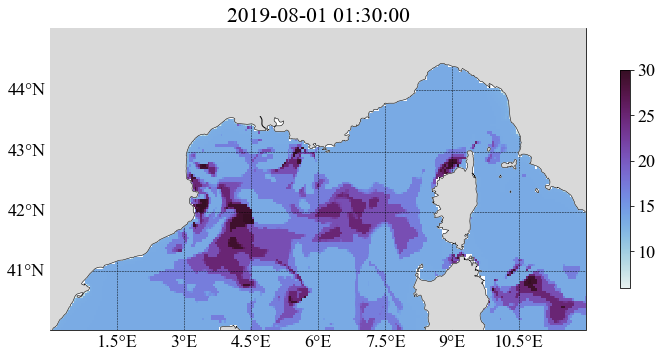

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=theproj)
ax.set_extent(domain)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='k', alpha=0.95, linestyle='--', zorder=2)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax.coastlines(color="k", linewidth=.5, zorder=5)
ax.add_feature(cfeature.LAND, color=".85", zorder=3)
pcm = ax.pcolormesh(lon, lat, MLD[0,:,:], transform=datacrs, 
                    cmap=cmocean.cm.dense, vmin=6., vmax=30.)
cb = plt.colorbar(pcm, shrink=.5, extend="both")


for iii in range(0, 2): #len(dates)):  
    
    pcm.remove() 
    thetitle = ax.set_title(dates[iii])
    
    dstring = dates[iii].strftime("%Y%m%dT%H%M%S")
    figname = os.path.join(figdir, f"mld_ecmwf_{dstring}.jpg")
    

    pcm = ax.pcolormesh(lon, lat, MLD[iii,:,:], transform=datacrs, 
                    cmap=cmocean.cm.dense, vmin=6., vmax=25.)
    

    # ax.coastlines(color="k", linewidth=.5, zorder=5)
    plt.savefig(figname, dpi=300, bbox_inches="tight")


plt.show()

## Time series at a given location

In [102]:
coords = [(3.75, 43.), (4.5, 42.), (4.5, 43.), (3.5, 41.), (5., 42.)]

In [108]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plt.title(f"Mixed layer depth from\nCMEMS product MEDSEA_ANALYSISFORECAST_PHY_006_013")

for cc in coords:
        
    lonind = np.argmin(np.abs(lon - cc[0]))
    latind = np.argmin(np.abs(lat - cc[1]))
    MLDtime = MLD[:,latind,lonind]
    ax.plot(dates, MLDtime, "o-", label=f"{cc[1]}°N, {cc[0]}°E")

ax.legend()
ax.set_ylabel("MLD\n(m)", rotation=0, ha="right")
ax.set_xlim(datetime.date(2019, 8, 1), datetime.date(2019, 8, 31))
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "MLD_locations.jpg"), dpi=300, bbox_inches="tight")
plt.close()

In [115]:
cc = (3.5, 41.)

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
# plt.title(f"Mixed layer depth at {cc[1]}°N, {cc[0]}°E\nCMEMS product MEDSEA_ANALYSISFORECAST_PHY_006_013")


    
lonind = np.argmin(np.abs(lon - cc[0]))
latind = np.argmin(np.abs(lat - cc[1]))
MLDtime = MLD[:,latind,lonind]
ax.plot(dates, MLDtime, "o-", label=f"{cc[1]}°N, {cc[0]}°E")
ax.set_ylabel("MLD\n(m)", rotation=0, ha="right")
ax.set_xlim(datetime.date(2019, 8, 8), datetime.date(2019, 8, 12))
ax.set_ylim(11.905, 11.915)
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "MLD_41N_3.5Ebbb.jpg"), dpi=300, bbox_inches="tight")
plt.close()

## Canary region

In [11]:
datafile2 = "/media/ctroupin/My Passport/data/CMEMS/cmems_mod_ibi_phy_anfc_0.027deg-2D_PT1H-m_1646688322174.nc"
os.path.isfile(datafile2)

True

In [12]:
with netCDF4.Dataset(datafile2) as nc:
    lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
    lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    time = nc.get_variables_by_attributes(standard_name="time")[0]
    dates = netCDF4.num2date(time[:], time.units, only_use_cftime_datetimes=False)
    MLD = nc.get_variables_by_attributes(standard_name="ocean_mixed_layer_thickness_defined_by_sigma_theta")[0][:]

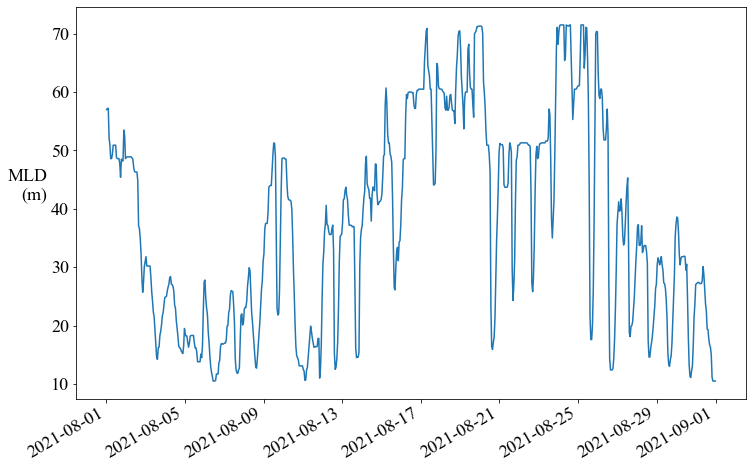

In [14]:
cc = (-15.5, 27.5)

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
# plt.title(f"Mixed layer depth at {cc[1]}°N, {cc[0]}°E\nCMEMS product MEDSEA_ANALYSISFORECAST_PHY_006_013")
    
lonind = np.argmin(np.abs(lon - cc[0]))
latind = np.argmin(np.abs(lat - cc[1]))
MLDtime = MLD[:,latind,lonind]
ax.plot(dates, MLDtime, "-", label=f"{cc[1]}°N, {cc[0]}°E")
ax.set_ylabel("MLD\n(m)", rotation=0, ha="right")
# ax.set_xlim(datetime.date(2022, 1, 1), datetime.date(2022, 2, 1))
#ax.set_ylim(11.905, 11.915)
fig.autofmt_xdate()
plt.savefig(os.path.join(figdir, "MLD_Canary2.jpg"), dpi=300, bbox_inches="tight")
plt.show()

In [9]:
dates[1:50]

masked_array(data=[real_datetime(2022, 1, 1, 1, 30),
                   real_datetime(2022, 1, 1, 2, 30),
                   real_datetime(2022, 1, 1, 3, 30),
                   real_datetime(2022, 1, 1, 4, 30),
                   real_datetime(2022, 1, 1, 5, 30),
                   real_datetime(2022, 1, 1, 6, 30),
                   real_datetime(2022, 1, 1, 7, 30),
                   real_datetime(2022, 1, 1, 8, 30),
                   real_datetime(2022, 1, 1, 9, 30),
                   real_datetime(2022, 1, 1, 10, 30),
                   real_datetime(2022, 1, 1, 11, 30),
                   real_datetime(2022, 1, 1, 12, 30),
                   real_datetime(2022, 1, 1, 13, 30),
                   real_datetime(2022, 1, 1, 14, 30),
                   real_datetime(2022, 1, 1, 15, 30),
                   real_datetime(2022, 1, 1, 16, 30),
                   real_datetime(2022, 1, 1, 17, 30),
                   real_datetime(2022, 1, 1, 18, 30),
                   real_datetime(2022